In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection
from sklearn import linear_model
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.use("../Misc/presentation.mplstyle")
import math
from sklearn import preprocessing 
from collections import Counter

## Sample Data

### Regression Data

In [45]:
# Sample wine data with an numeric quality score (integer)  
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
Y = df['quality'].values
le = preprocessing.LabelEncoder().fit(Y)
Y = le.transform(Y)
df = preprocessing.scale(df.drop('quality',1))
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df, Y)

/tmp/ipykernel_181/1284459285.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = preprocessing.scale(df.drop('quality',1))


### Classification Data

In [17]:
# Sample personal health data with binary label of whether the person has diabetes
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
df.columns =['pregnancy count', 'glucose concentration', 'blood pressure', 'skinfold thickness', 'insulin', 'body mass index', 'diabetes pidegree', 'age', 'class']
Y = df['class'].values
df = preprocessing.scale(df.drop('class',1))
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df, Y)

/tmp/ipykernel_181/702962683.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = preprocessing.scale(df.drop('class',1))


## 1. Linear Regression
- Linear regression with gradient descent
- Linear regression using least squares formula to calculate weights
- Linear regression +  Lasso regularization with gradient descent
- Linear regression + Ridge regularization with gradient descent

### 1.1 Linear Regression with Gradient Descent

In [19]:
def linreg_gd(X_train, y_train, lr=0.1, num_iter=1000):
    m = X_train.shape[0]   # number of testing data points
    n = X_train.shape[1]   # number of features
    abs_err = []
    X = np.column_stack((X_train, np.ones(m)))
    w = np.zeros(n+1)
    for i in range(num_iter):
        y_pred = np.matmul(X, w)
        err = y_train - y_pred
        # least square loss: 1/m * (y_train - y_pred) ^ 2
        abs_err.append(np.mean(err**2))   
        gradient = - np.matmul(X.T, err) / m
        w -= lr * gradient
    return w, abs_err

### Test
We should see training error decreasing over iterations

[ 0.0244851  -0.21652344 -0.03430126  0.0073608  -0.09386438  0.06568137
 -0.12588253  0.00467662 -0.0592274   0.14685876  0.30223722  2.6249093 ]


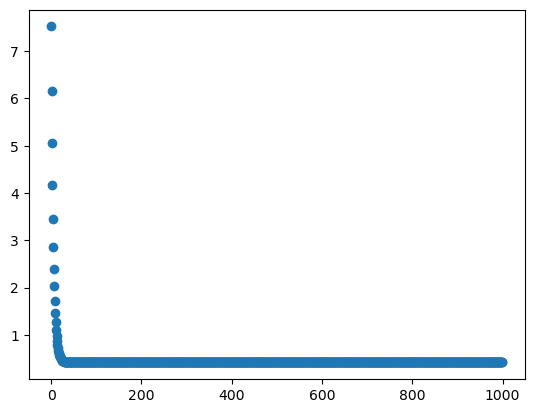

In [20]:
w, abs_err = linreg_gd(x_train, y_train)
print(w)
plt.scatter(np.arange(len(abs_err)), abs_err)

### 1.2 Linear Regression with Ordinary Least Squares 

In [21]:
def linreg_ols(X_train, y_train):
    X = np.column_stack((X_train, np.ones(X_train.shape[0])))
    w = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y_train))
    return w

### Test
Weights output should be similar to the weights output from `linreg_gd`

In [22]:
linreg_ols(x_train, y_train)

array([ 0.02432918, -0.21652636, -0.03428805,  0.00731678, -0.09387657,
        0.06569476, -0.12589959,  0.00481803, -0.05931143,  0.14684088,
        0.30231639,  2.62490888])

### 1.3 Linear Regression with Lasso Regularization
There's only one change from the `linreg_gd` function: the gradient calculation. 
We could add the lasso weight penalty to the loss function but it's easier to track the error coming from `y_train - y_pred` only

In [23]:
def linreg_lasso_gd(X_train, y_train, lr=0.1, num_iter=1000, alpha=0.1):
    m = X_train.shape[0]
    n = X_train.shape[1]
    abs_err = []
    X = np.column_stack((X_train, np.ones(m)))
    w = np.zeros(n+1)
    for _ in range(num_iter):
        y_pred = np.matmul(X, w)
        err = y_train - y_pred
        abs_err.append(np.mean(np.abs(err**2)))
        gradient = - np.matmul(X.T, err) / m + 2*alpha*np.sign(w)   # the only change from linreg_gd
        w -= lr * gradient
    return w, abs_err

### Test
Weights outputd should be more sparse than results from `linreg_gd`


[-4.53206558e-03 -8.28308549e-02  2.52777707e-02 -9.58511807e-03
 -2.66399514e-02  8.65688798e-04 -2.51142814e-02 -3.08373778e-04
 -1.24311476e-02  2.13653684e-02  1.56361938e-01  2.42138986e+00]


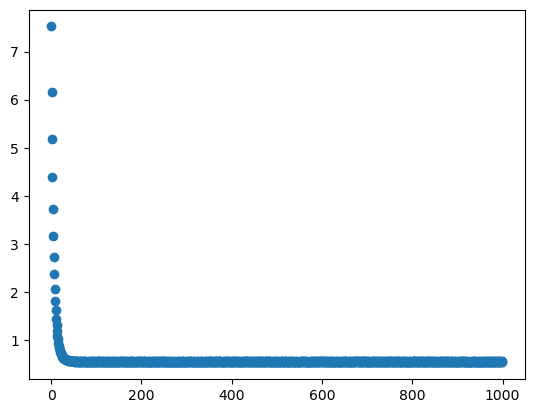

In [24]:
w, abs_err = linreg_lasso_gd(x_train, y_train)
print(w)
plt.scatter(np.arange(len(abs_err)), abs_err)

### 1.4 Linear Regression with Ridge Regularization
Similarly, only the gradient calculation changes from the `linreg_gd` function

In [25]:
def linreg_lasso_gd(X_train, y_train, lr=0.1, num_iter=1000, alpha=0.1):
    m = X_train.shape[0]
    n = X_train.shape[1]
    abs_err = []
    X = np.column_stack((X_train, np.ones(m)))
    w = np.zeros(n+1)
    for _ in range(num_iter):
        y_pred = np.matmul(X, w)
        err = y_train - y_pred
        abs_err.append(np.mean(np.abs(err**2)))
        gradient = - np.matmul(X.T, err) / m + 2*alpha*w
        w -= lr * gradient
    return w, abs_err

### Test
We are expected to see smaller weights but not necessarily sparse weights

[ 0.04206569 -0.17513806  0.01522304  0.02025567 -0.08610069  0.04095288
 -0.09778237 -0.05729216 -0.03130913  0.12404878  0.22914681  2.18620391]


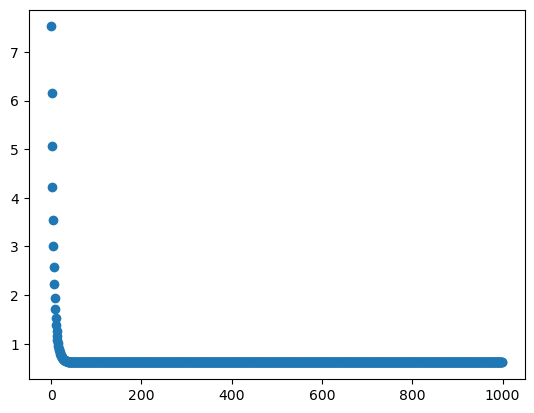

In [26]:
w, abs_err = linreg_lasso_gd(x_train, y_train)
print(w)
plt.scatter(np.arange(len(abs_err)), abs_err)

## 2. Logistic Regression

In [3]:
def logistic_regression_gd(X_train, y_train, lr=0.1, num_iter=1000):
    m = X_train.shape[0]   # number of testing data points
    n = X_train.shape[1]   # number of features
    abs_err = []
    X = np.column_stack((X_train, np.ones(m)))
    w = np.zeros(n+1)
    for i in range(num_iter):
        z = np.matmul(X, w)
        y_pred = 1/(1 + np.exp(-z))
        err = y_train - y_pred
        abs_err.append(np.mean(np.abs(err)))  
        gradient = - np.matmul(X.T, err) / m
        w -= lr * gradient
    return w, abs_err
    

### Test

[ 0.34357459  1.25855923 -0.27376869  0.06696354 -0.14192327  0.65022705
  0.36491664  0.13925122 -0.83390201]


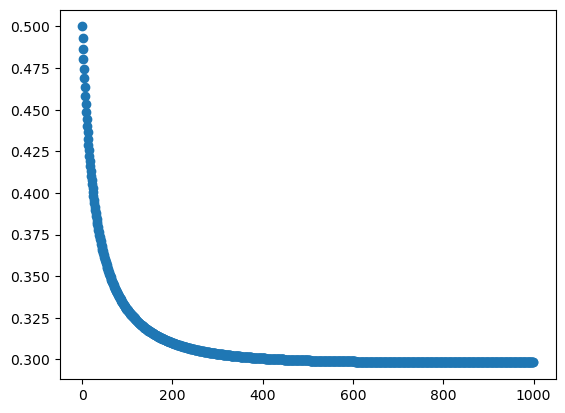

In [4]:
w, abs_err = logistic_regression_gd(x_train, y_train)
print(w)
plt.scatter(np.arange(len(abs_err)), abs_err)

In [21]:
# calculate prediction accuracy
def logistic_regression_accuracy(X_test, w, Y_test):
    X = np.column_stack((X_test, np.ones(x_test.shape[0])))
    z = np.matmul(X, w)
    y_pred = 1/(1 + np.exp(-z))
    y_pred = np.array([0 if y < 0.5 else 1 for y in y_pred])
    correct = sum([a == b for a, b in zip(y_pred, Y_test)])
    accuracy = correct / len(Y_test)
    return accuracy

In [22]:
logistic_regression_accuracy(x_test, w, y_test)

0.75

## K-Means Clustering

In [32]:
def k_means(X_train, k):
    def select_cluster(x, centroids):
        distances = [np.sqrt(np.sum((x-c)**2)) for c in centroids]
        min_d = min(distances)
        return distances.index(min_d)
        
    # randomly choosing k data points to be centroids
    centroids_old = np.zeros((k, X_train.shape[1]))
    centroids_new = X_train[np.random.choice(len(X_train), k)]
    while not np.array_equal(centroids_old, centroids_new):
        centroids_old = centroids_new
        assignment = [-1]*len(X_train)
        cluster_items = [[] for _ in range(k)]
        for i, x in enumerate(X_train):
            cluster = select_cluster(x, centroids_old)
            assignment[i] = cluster
            cluster_items[cluster].append(x)
        centroids_new = np.array([np.mean(cluster, axis=0) for cluster in cluster_items])
    return centroids_new, assignment


### Choosing K
Using the elbow method. Graph error and k values - the graph should assemble a decreasing exponential curve. The "elbow" of the curve represent the best k value. Conceptually, it means we don't want to further increase k just to marginally decrease the total distance between points and their centroids.

In [18]:
def choose_k(X_train, max_k=10):
    errors = []
    K = range(1, max_k)
    for k in K:
        centroids, assignment = k_means(X_train, k)
        err = 0
        for i in range(len(X_train)):
            c = centroids[assignment[i]]
            err += np.sqrt(np.sum((X_train[i]-c)**2))
        errors.append(err)
    return errors, K

In [21]:
errors, K = choose_k(x_train, 12)

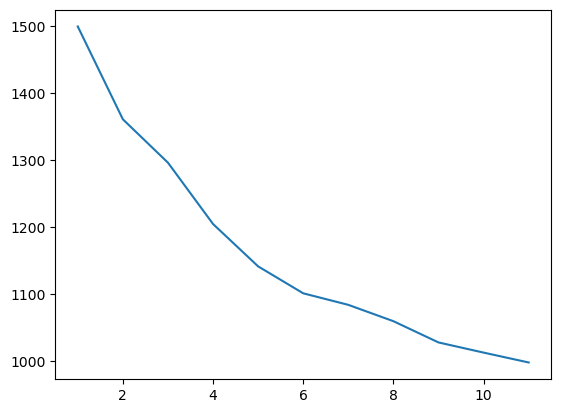

In [22]:
plt.plot(K, errors)

### Test
Compare classification result with sklearn's k-means. It would not be the same because the initialization is different. However, we can see that the distribution of classes is similar

We ran it on the classification data.

In [33]:
k_means(x_test, 6)

(array([[-0.54687397, -0.0581768 , -3.57012772, -1.28688187, -0.69355921,
         -1.19531707, -0.2596205 , -0.34977036],
        [ 0.40305347,  0.65884435,  0.43463512, -1.14710392, -0.69355921,
          0.10159204, -0.40505874,  1.31204932],
        [-0.54093692, -0.5363101 , -0.10031735, -0.34606876, -0.16286657,
         -0.68144583, -0.04320817, -0.72365275],
        [-0.64769174,  0.07761627,  0.23552358,  0.67048276, -0.01963416,
          0.66867296,  0.03874467, -0.55683226],
        [-0.19436183,  1.35971686, -0.27649444,  0.52418337,  2.98294556,
          0.16768475,  0.80675709, -0.08783036],
        [ 1.15234968,  0.65721041,  0.49714194,  0.61420945,  0.3896397 ,
          0.29425142,  0.18647066,  1.12640743]]),
 [1,
  3,
  1,
  5,
  1,
  2,
  3,
  2,
  3,
  3,
  3,
  3,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  5,
  2,
  0,
  1,
  3,
  2,
  3,
  5,
  2,
  1,
  1,
  3,
  2,
  5,
  4,
  1,
  2,
  2,
  0,
  5,
  2,
  5,
  3,
  5,
  3,
  3,
  5,
  2,
  3,
  1,
  3,
  5,
  3,


In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(x_test)

In [29]:
print(f'cluster centers: {kmeans.cluster_centers_}')
print(f'labels: {kmeans.labels_}')

cluster centers: [[-0.6014675  -0.24232876 -0.0070356   0.16146567 -0.02011418 -0.0813117
  -0.32342712 -0.67338768]
 [-0.57386054  0.44248635  0.30943177  0.42653837  0.08645339  0.60658008
   1.97637254 -0.15410822]
 [ 0.40786729  0.57103499  0.40247925 -1.15465949 -0.69355921  0.007035
  -0.453109    1.22170984]
 [ 1.42783932  0.36765897  0.55632025  0.66019222  0.2642553   0.3205132
   0.05216857  1.18819202]
 [ 0.0044232   1.63826661 -0.08644165  0.59922441  3.21428195  0.15975725
   0.30392033  0.06649547]
 [-0.54687397 -0.0581768  -3.57012772 -1.28688187 -0.69355921 -1.19531707
  -0.2596205  -0.34977036]]
labels: [2 0 2 3 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 5 2 0 0 0 1 0 2 2 1 0 3 4 2 0 0
 5 0 0 0 0 3 0 0 3 0 1 2 1 3 0 2 3 0 2 0 0 0 0 1 0 3 3 0 0 0 0 0 0 0 4 5 0
 0 0 2 0 0 2 0 4 1 2 0 0 4 0 0 1 4 0 3 1 0 0 0 3 2 1 2 4 1 5 0 3 2 0 4 2 0
 2 0 2 0 3 5 1 0 3 1 0 0 3 1 3 2 3 4 0 3 1 2 0 2 4 3 0 2 1 5 0 2 1 2 2 4 1
 2 0 0 2 2 1 0 5 2 3 5 2 0 2 0 1 2 0 2 0 0 0 1 4 1 3 3 4 0 0 0 4 0 0 0 3

## K Nearest Neighbors

In [37]:
def KNN_classification(X_train, y_train, X_test, k=5):
    y_pred = []
    for x_test in X_test:
        # calculate distance to each training data
        distances = [[i, np.sqrt(np.sum((X_train[i]-x_test)**2))] for i in range(len(X_train))]
        distances.sort(key = lambda x: x[1])
        top_k_classes = [y_train[d[0]] for d in distances[:k]]
        y_pred.append(max(top_k_classes,key=top_k_classes.count))
    return y_pred

In [59]:
def KNN_regression(X_train, y_train, X_test, k=5):
    y_pred = []
    for x_test in X_test:
        # calculate distance to each training data
        distances = [[i, np.sqrt(np.sum((X_train[i]-x_test)**2))] for i in range(len(X_train))]
        distances.sort(key = lambda x: x[1])
        top_k_values = [y_train[d[0]] for d in distances[:k]]
        y_pred.append(np.mean(top_k_values))
    return y_pred

### Test for classification

In [43]:
def classification_accuracy(y_pred, y_train):
    correct = sum([a == b for a, b in zip(y_pred, y_test)])
    return correct / len(y_test)

y_pred = KNN_classification(x_train, y_train, x_test)
classification_accuracy(y_pred, y_train)

0.796875

In [63]:
def regression_accuracy(y_pred, y_train):
    correct = sum([round(a) == b for a, b in zip(y_pred, y_test)])
    return correct / len(y_test)

y_pred = KNN_regression(x_train, y_train, x_test)
regression_accuracy(y_pred, y_train)

0.585

## Convolutional Neural Network

In [2]:
from keras.datasets import mnist
(train_img, y_train), (val_img, y_test) = mnist.load_data()

2022-09-29 15:46:59.112314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-29 15:46:59.112508: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
train_img.shape

(60000, 28, 28)

For now, we assume there's no padding and the stride is always 1.
We are not considering

In [2]:
# X[c][w][h]
# conv[m][c][k][k]
# reshaping one data entry 
def im2col(X, conv, stride=1, pad=0):
    C = X.shape[0]  # channels
    H = X.shape[1]  # width of image
    W = X.shape[2]  # height of image
    K = conv.shape[2]  # conv layer dimension
    output = np.zeros((C*(H-K+1)*(W-K+1), (H-K+1)*(W-K+1)))
    for c in range(C):
        for h in range(H-K+1):
            for w in range(W-K+1): 
                square = X[c, h:h+K, w:w+K]
                output[c*K**2:(c+1)*K**2, h*(W-K+1)+w:h*(W-K+1)+w+1] = square.reshape(-1,1)
    return output

# X here is one image input
def convolve(X, conv, stride=1, pad=0):
    conv_col = conv.reshape(conv.shape[0],-1)
    img_col = im2col(X, conv, stride, pad)
    return np.matmul(conv_col, img_col)

In [23]:
conv11 = np.matrix('1 2; 3 4')
conv12 = np.matrix('5 6; 7 8')
conv13 = np.matrix('9 10; 11 12')
conv21 = np.matrix('101 102; 103 104')
conv22 = np.matrix('105 106; 107 108')
conv23 = np.matrix('109 110; 111 112')
conv1 = np.array([conv11, conv12, conv13])
conv2 = np.array([conv21, conv22, conv23])
conv = np.array([conv1, conv2])
conv

array([[[[  1,   2],
         [  3,   4]],

        [[  5,   6],
         [  7,   8]],

        [[  9,  10],
         [ 11,  12]]],


       [[[101, 102],
         [103, 104]],

        [[105, 106],
         [107, 108]],

        [[109, 110],
         [111, 112]]]])

In [24]:
conv.reshape(conv.shape[0],-1)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]])

In [3]:
i0 = np.repeat(np.arange(3), 4)

In [4]:
np.tile(i0, 2)

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2,
       2, 2])

In [3]:
a = np.matrix('1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16; 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116')

In [5]:
a.reshape(a.shape[0], 4, 4)

ValueError: shape too large to be a matrix.

In [9]:
def init_conv_parameters(num_filters, num_channels, filter_shape):
        l1 = []
        for i in range(num_filters):
            l2 = []
            for j in range(num_channels):
                    l2.append(np.random.randn(filter_shape[0], filter_shape[1]) * .1)
            l1.append(l2)
        return np.array(l1)
    
init_conv_parameters(2, 3, (2,2))

array([[[[-0.01432393,  0.06942734],
         [ 0.14433663,  0.06513587]],

        [[-0.02662315,  0.00472245],
         [ 0.12441861, -0.05063073]],

        [[-0.04020753,  0.02172878],
         [ 0.02303656,  0.08996843]]],


       [[[ 0.08960571,  0.09796114],
         [ 0.07416598,  0.02825144]],

        [[ 0.03548068,  0.13829336],
         [ 0.04264725,  0.2433835 ]],

        [[ 0.18888057, -0.01338895],
         [-0.1037345 , -0.00367499]]]])

In [15]:
np.arange(2)[:, None]


array([[0],
       [1]])

In [14]:
np.arange(2)

array([0, 1])

In [18]:
def img2col(matrix, filter_size):
        col_extent = matrix.shape[1]-filter_size[1] + 1
        row_extent = matrix.shape[0]-filter_size[0] + 1
        start_idx = np.arange(filter_size[0])[:, None]*matrix.shape[1] + np.arange(filter_size[1])
        offset_idx = np.arange(row_extent)[:,None]*matrix.shape[0] + np.arange(col_extent)
        out = np.take(matrix, start_idx.ravel()[:,None] + offset_idx.ravel())
        return out.T

In [21]:
mat = np.matrix('1 2 3; 4 5 6; 7 8 9')
output = img2col(mat, (2,2))

In [29]:
output.flatten().reshape(2, 2, 4)

ValueError: shape too large to be a matrix.

In [24]:
output

matrix([[1, 2, 4, 5],
        [2, 3, 5, 6],
        [4, 5, 7, 8],
        [5, 6, 8, 9]])